In [56]:
#librerías para el manejo de los datos
import pandas as pd
import numpy as np

#librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

#librerías para los análisis estadísticos
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import skew

import pycountry_convert as pc

pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Abrimos el DF:

In [84]:
df = pd.read_csv('../files/df_eu_depurado.csv', index_col=0)
df.head()

,age,gender,country_q3,education_q4,role_q5,experience_q6,Q7,sector_q20,company_size_q21,anual_income_q25,continent,gender_def,annual_incom€_q25
8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,"Python, SQL",NaN,NaN,NaN,Europe,Man,NaN
15,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,"Python, C, C++, MATLAB",Academics/Education,50-249 employees,"10,000-14,999",Europe,Man,"9,300-13,949"
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,"Python, SQL",Energy/Mining,"1000-9,999 employees","2,000-2,999",Europe,Man,"1,860-2,789"
25,25-29,Woman,Poland,Master’s degree,Machine Learning Engineer,3-5 years,"Python, C++",Computers/Technology,0-49 employees,"25,000-29,999",Europe,Woman,"23,250-27,899"
41,25-29,Man,Italy,Master’s degree,Other,1-3 years,"Python, MATLAB",Energy/Mining,0-49 employees,"30,000-39,999",Europe,Man,"27,900-37,199"


### Funciones de Chi Cuadrado y V de Crammer:

### Función de Chi Cuadrado:

In [58]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
def chi2(df): 
    chi2 = chi2_contingency(df)
    if chi2[1] <= .05:
        print(f"Existe una relación estadísticamente significativa en ambas variables, con una p de {round(chi2[1], 2)}")
    else:
        print(f"No existe una relación estadísticamente significativa en ambas variables, con una p de {round(chi2[1], 2)}")

### Función de V de Crammer:

In [59]:
#https://towardsdatascience.com/contingency-tables-chi-squared-and-cramers-v-ada4f93ec3fd
def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    # effect size data frame for cramer's v function
    data = cross_tabs
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
    
    # getting the chi sq. stat
    chi2 = stats.chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    
    if v <= 0.20:
              return print(f'La relación entre ambas variables es débil, siendo la V de Crammer = {round(v, 3)}')
    elif v <= 0.60:
              return print(f'La relación entre ambas variables es moderada, siendo la V de Crammer = {round(v, 3)}')
    elif v > 0.60:
              return print(f'La relación entre ambas variables es fuerte, siendo la V de Crammer = {round(v, 3)}')
          
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}')
    print(f'\nEffect Size Thresholds\n{sizes}\n')

## Tablas de contingencia:

In [60]:
df.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'annual_incom€_q25'],
      dtype='object')

### Depuración de variable 'role_q5':

In [123]:
trabajos = list(df['role_q5'].unique())
trabajos

['Currently not employed',
 'Research Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Other',
 'Data Scientist',
 'Data Engineer',
 'Student',
 'Software Engineer',
 'Business Analyst',
 'Statistician',
 'Program/Project Manager',
 'Developer Relations/Advocacy',
 'Product Manager',
 'DBA/Database Engineer']

In [145]:
def roles_rar (col):
    
    data = ['Data Scientist','Data Engineer', 'Business Analyst', 'Statistician']
    supervising_roles = ['Program/Project Manager', 'Product Manager',]
    soft_eng = ["Software Engineer", "DBA/Database Engineer"]
    relatios = ["Developer Relations/Advocacy"]
    nulos = ["Currently not employed", "Other"]
    student = ['Student']

    if col in data:
        return 'Data-related role'
    elif col in supervising_roles:
        return 'Supervising role'
    elif col in soft_eng:
        return 'Sofware-related role'
    elif col in relatios:
        return "Developer Relations/Advocacy"
    elif col in student:
        return 'Student'
    elif col in nulos:
        return np.nan
            

### Prueba STUDENT:

In [153]:
def student (col):
    
    data = ['Data Scientist','Data Engineer', 'Business Analyst', 'Statistician']
    supervising_roles = ['Program/Project Manager', 'Product Manager',]
    soft_eng = ["Software Engineer", "DBA/Database Engineer"]
    relatios = ["Developer Relations/Advocacy"]
    nulos = ["Currently not employed", "Other"]
    student = ['Student']

    if col in student:
        return 'Student'
    else:
        return 'Not student'

In [146]:
#creamos las columnas
df['role_q5_def'] = df['role_q5'].apply(roles_rar)
df['student'] = df['role_q5'].apply(student)

In [157]:
student_contig = pd.crosstab(df['gender_def'], df['student'], margins=False)
student_contig

student,Not student,Student
gender_def,,
Man,3034,536
NB,19,5
Woman,528,151


In [158]:
chi2(student_contig)
cramers_v(student_contig)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.072


No da significativo apenas. Descartamos.

In [147]:
df['role_q5_def'].value_counts()

Data-related role               1137
Student                          692
Sofware-related role             447
Supervising role                 242
Developer Relations/Advocacy      16
Name: role_q5_def, dtype: int64

#### Puesto responsabilidad:

In [168]:
def respons (col):
    
    data = ['Data Scientist','Data Engineer', 'Business Analyst', 'Statistician']
    supervising_roles = ['Program/Project Manager', 'Product Manager']
    soft_eng = ["Software Engineer", "DBA/Database Engineer"]
    relatios = ["Developer Relations/Advocacy"]
    nulos = ["Currently not employed", "Other"]
    student = ['Student']

    if col in supervising_roles:
        return 'Supervisor'
    else:
        return 'Not supervisor'

In [171]:
df['supervisor'] = df['role_q5'].apply(respons)

In [172]:
df['supervisor'].value_counts()

Not supervisor    4031
Supervisor         242
Name: supervisor, dtype: int64

### Género y educación:

In [85]:
df['gender_def'].value_counts()

Man      3570
Woman     679
NB         24
Name: gender_def, dtype: int64

In [61]:
#https://stackoverflow.com/a/21247312
gen_ed = pd.crosstab(df['experience_q6'], df['gender_def'], margins=False)
gen_ed

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,801,3,176
10-20 years,486,4,71
20+ years,532,2,34
3-5 years,616,7,102
5-10 years,601,6,92
< 1 years,467,1,171
I have never written code,67,1,33


In [62]:
chi2_gen_ed = chi2(gen_ed)
v_gen_ed = cramers_v(gen_ed)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.128


##### % verticales:

In [63]:
gen_ed_per = pd.crosstab(df['experience_q6'], df['gender_def'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_ed_per

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,0.22,0.12,0.26
10-20 years,0.14,0.17,0.10
20+ years,0.15,0.08,0.05
3-5 years,0.17,0.29,0.15
5-10 years,0.17,0.25,0.14
< 1 years,0.13,0.04,0.25
I have never written code,0.02,0.04,0.05


### Género y puesto:

In [148]:
#https://stackoverflow.com/a/21247312
gen_role = pd.crosstab(df['role_q5_def'], df['gender_def'], margins=False)
gen_role

gender_def,Man,NB,Woman
role_q5_def,,,
Data-related role,963,4,170
Developer Relations/Advocacy,13,0,3
Sofware-related role,396,3,48
Student,536,5,151
Supervising role,214,2,26


In [149]:
#calculamos si existe o no relación y el peso de ésta
chi2_gen_role = chi2(gen_role)
v_gen_role = cramers_v(gen_role)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.083


COMO DATO: Cuando se me ha olvidado incluir la variable de estudiante, la relación NO ha sido significativa!!!

Actualización: La relación entre ser estudiante o no y el género es muy débil :(

In [159]:
gen_role_per = gen_role.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_role_per

gender_def,Man,NB,Woman
role_q5_def,,,
Data-related role,0.45,0.29,0.43
Developer Relations/Advocacy,0.01,0.00,0.01
Sofware-related role,0.19,0.21,0.12
Student,0.25,0.36,0.38
Supervising role,0.10,0.14,0.07


#### Puesto de responsabilidad:

In [174]:
gen_resp = pd.crosstab(df['gender_def'], df['supervisor'], margins=False)
gen_resp

supervisor,Not supervisor,Supervisor
gender_def,,
Man,3356,214
NB,22,2
Woman,653,26


In [175]:
chi2(gen_resp)
cramers_v(gen_resp)

No existe una relación estadísticamente significativa en ambas variables, con una p de 0.07
La relación entre ambas variables es débil, siendo la V de Crammer = 0.035


Modificamos la variable de género?

In [186]:
def gender_binary (col):
    if col in 'Man':
        return 'Man'
    elif col in 'Woman':
        return 'Woman'
    else:
        return np.nan

In [187]:
df['gender_binary'] = df['gender_def'].apply(gender_binary)

In [188]:
gen_resp_bin = pd.crosstab(df['gender_binary'], df['supervisor'], margins=False)
gen_resp_bin

supervisor,Not supervisor,Supervisor
gender_binary,,
Man,3356,214
Woman,653,26


In [189]:
chi2(gen_resp_bin)
cramers_v(gen_resp_bin)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.03
La relación entre ambas variables es débil, siendo la V de Crammer = 0.033


Ahora es significativa, pero con una relación muy débil:  
Existe una relación estadísticamente significativa en ambas variables, con una p de 0.03  
La relación entre ambas variables es débil, siendo la V de Crammer = 0.033  

### Género y experiencia:

In [67]:
gen_exp = pd.crosstab(df['experience_q6'], df['gender_def'], margins=False)
gen_exp

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,801,3,176
10-20 years,486,4,71
20+ years,532,2,34
3-5 years,616,7,102
5-10 years,601,6,92
< 1 years,467,1,171
I have never written code,67,1,33


In [68]:
#calculamos si existe o no relación y el peso de ésta
chi2_gen_exp = chi2(gen_exp)
v_gen_exp= cramers_v(gen_exp)


Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.128


In [69]:
gen_exp_per = gen_exp.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_ed_per

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,0.22,0.12,0.26
10-20 years,0.14,0.17,0.10
20+ years,0.15,0.08,0.05
3-5 years,0.17,0.29,0.15
5-10 years,0.17,0.25,0.14
< 1 years,0.13,0.04,0.25
I have never written code,0.02,0.04,0.05


### Género y salario:

In [70]:
df.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'annual_incom€_q25'],
      dtype='object')

In [71]:
gen_sal = pd.crosstab(df['annual_incom€_q25'], df['gender_def'], margins=False)
gen_sal

gender_def,Man,NB,Woman
annual_incom€_q25,,,
"0-929,07",233,2,77
"1,860-2,789",75,0,16
"116,250-139,499",79,0,6
"13,950-18,599",102,2,18
"139,500-185,999",48,1,4
"18,600-23,249",120,1,15
"186,000-232,499",21,0,1
"2,790-3,719",43,0,5
"23,250-27,899",130,0,33


In [72]:
chi2_gen_sal = chi2(gen_sal)
v_gen_sal = cramers_v(gen_sal)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.13


In [73]:
gen_sal_per = gen_sal.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_sal_per

gender_def,Man,NB,Woman
annual_incom€_q25,,,
"0-929,07",0.09,0.12,0.18
"1,860-2,789",0.03,0.00,0.04
"116,250-139,499",0.03,0.00,0.01
"13,950-18,599",0.04,0.12,0.04
"139,500-185,999",0.02,0.06,0.01
"18,600-23,249",0.05,0.06,0.03
"186,000-232,499",0.01,0.00,0.00
"2,790-3,719",0.02,0.00,0.01
"23,250-27,899",0.05,0.00,0.08


## EDAD

### Género y edad:

In [74]:
df.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'annual_incom€_q25'],
      dtype='object')

In [75]:
gen_edad = pd.crosstab(df['age'], df['education_q4'], margins=False)
gen_edad

education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
age,,,,,,,
18-21,213,2,6,68,8,0,56
22-24,136,18,3,301,2,3,14
25-29,128,120,18,494,9,6,24
30-34,84,134,12,371,21,9,29
35-39,65,150,18,260,15,15,33
40-44,53,107,20,225,15,12,21
45-49,51,80,10,200,13,11,18
50-54,38,57,7,137,13,15,17
55-59,24,46,3,71,9,5,10


In [76]:
chi2_gen_edad = chi2(gen_edad)
v_gen_edad = cramers_v(gen_edad)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.187


### Edad y educación:

In [77]:
edad_educ = pd.crosstab(df['education_q4'], df['age'], margins=False)
edad_educ

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Bachelor’s degree,213,136,128,84,65,53,51,38,24,21,0
Doctoral degree,2,18,120,134,150,107,80,57,46,27,10
I prefer not to answer,6,3,18,12,18,20,10,7,3,4,0
Master’s degree,68,301,494,371,260,225,200,137,71,52,5
No formal education past high school,8,2,9,21,15,15,13,13,9,5,0
Professional doctorate,0,3,6,9,15,12,11,15,5,7,3
Some college/university study without earning a bachelor’s degree,56,14,24,29,33,21,18,17,10,4,2


In [78]:
chi2_edu_edad = chi2(edad_educ)
v_edu_edad= cramers_v(edad_educ)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.187


### Edad y experiencia:

In [79]:
edad_exp = pd.crosstab(df['experience_q6'], df['age'],margins=False)
edad_exp

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
experience_q6,,,,,,,,,,,
1-3 years,159,191,227,146,87,76,41,31,17,5,0
10-20 years,1,4,28,92,153,132,71,48,20,9,3
20+ years,1,0,0,1,29,83,145,128,89,79,13
3-5 years,86,143,199,115,65,46,36,13,11,11,0
5-10 years,27,58,180,187,110,46,43,24,11,10,3
< 1 years,73,77,151,102,95,54,37,30,14,6,0
I have never written code,6,4,14,17,17,16,10,10,6,0,1


In [80]:
chi2(edad_exp)
cramers_v(edad_exp)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es moderada, siendo la V de Crammer = 0.292


### Edad y responsabilidad:

In [191]:
edad_respons = pd.crosstab(df['age'], df['supervisor'])
edad_respons

supervisor,Not supervisor,Supervisor
age,,
18-21,353,0
22-24,475,2
25-29,774,25
30-34,632,28
35-39,517,39
40-44,417,36
45-49,326,57
50-54,255,29
55-59,153,15


In [192]:
chi2(edad_respons)
cramers_v(edad_respons)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.182


## Representación gráfica:

### Género:

In [89]:
gender2 = df['gender_def'].value_counts()
gender2.index

Index(['Man', 'Woman', 'NB'], dtype='object')

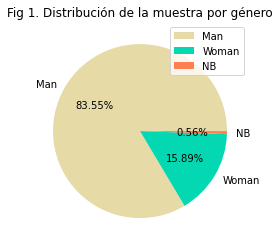

In [193]:
gender2 = df['gender_def'].value_counts()
gender2.index

plt.figure()
plt.pie(gender2.values, labels=gender2.index, autopct='%1.2f%%', colors=['#E6DAA6','#04D8B2','#FF7F50'])
plt.legend(gender2.index)
plt.title('Fig 1. Distribución de la muestra por género')
plt.show();

In [160]:
tab_conting = pd.crosstab(df['role_q5_def'], df['gender_def'], margins=False)
tab_conting

gender_def,Man,NB,Woman
role_q5_def,,,
Data-related role,963,4,170
Developer Relations/Advocacy,13,0,3
Sofware-related role,396,3,48
Student,536,5,151
Supervising role,214,2,26


### Gen x Puesto:

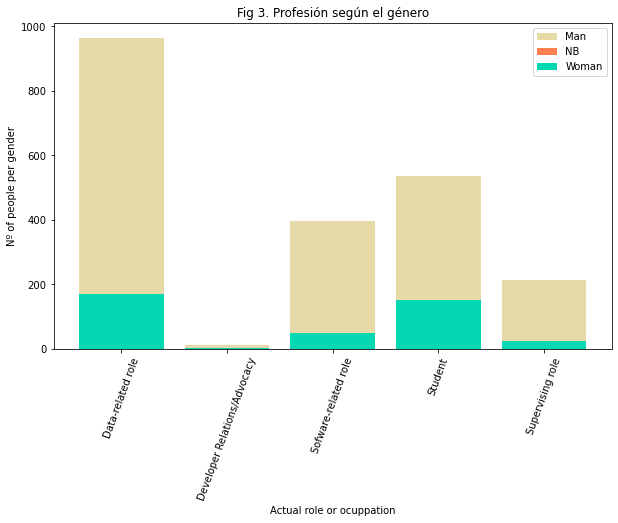

In [194]:
tab_conting = pd.crosstab(df['role_q5_def'], df['gender_def'], margins=False)
tab_conting

plt.figure(figsize=[10,6])

#representación gráfica
plt.bar(tab_conting['Man'].index, tab_conting['Man'].values, color= '#E6DAA6')
plt.bar(tab_conting['NB'].index, tab_conting['NB'].values, color= '#FF7F50')
plt.bar(tab_conting['Woman'].index, tab_conting['Woman'].values, color='#04D8B2')


#etiquetas
plt.xticks(rotation=70)
plt.legend(tab_conting.columns)
plt.title('Fig 3. Profesión según el género')
plt.xlabel('Actual role or ocuppation')
plt.ylabel('Nº of people per gender')

plt.show();